In [2]:
import pandas as pd
import mca
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.decomposition import PCA

from scipy.cluster import hierarchy

import sys
sys.path.append("..")

/Users/tessa/miniforge3/envs/nimfa/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tessa/miniforge3/envs/nimfa/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tessa/miniforge3/envs/nimfa/lib/python3.11/site-packages/umap/d

In [3]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)

In [5]:
# keep only columns starting with "Symptom_"

sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]

In [9]:
sympdf.isna().sum().sum() # don't need to fill NAs anymore yay

0

In [11]:
reducer = umap.UMAP()
reducer.fit(sympdf)

sympdf.shape

(6031, 162)

In [14]:
mca_ben = mca.MCA(sympdf, ncols=None)
mca_ind = mca.MCA(sympdf, ncols=None, benzecri=False)



In [15]:
vars(mca_ind)

{'K': 162,
 'J': 162,
 'r': 3        0.000081
 5        0.000166
 6        0.000118
 8        0.000213
 9        0.000191
            ...   
 14158    0.000199
 14161    0.000129
 14163    0.000236
 14166    0.000081
 14168    0.000132
 Length: 6031, dtype: float64,
 'c': Symptom_Memory_short                  0.020515
 Symptom_Memory_long                   0.009216
 Symptom_Memory_no_new_memories        0.001943
 Symptom_Memory_forget_tasks           0.003062
 Symptom_Memory_other                  0.002665
                                         ...   
 Symptom_SkinAllergy_shingles          0.000570
 Symptom_PEM                           0.019613
 Symptom_Fatigue                       0.021740
 Symptom_Change_sensitivity_to_meds    0.004637
 Symptom_New_allergies                 0.002466
 Length: 162, dtype: float64,
 'cor': False,
 'D_r': array([[111.1315764 ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  77.70385376,   0

In [16]:
x = mca_ben.fs_r(1)

In [19]:
u = reducer.fit_transform(sympdf)

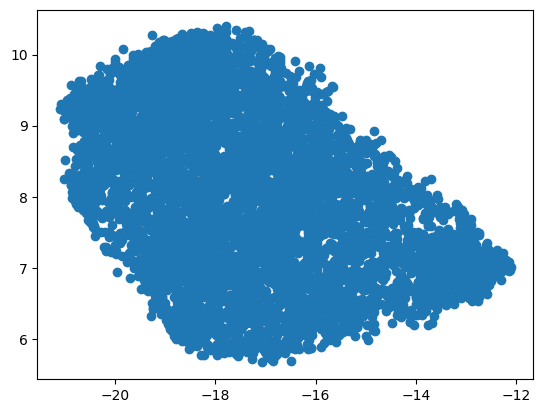

In [20]:
plt.scatter(u[:,0], u[:,1])

In [21]:
symptom_matrix_np = sympdf.values


In [22]:
co_occurrence_matrix = np.dot(symptom_matrix_np.T, symptom_matrix_np)


In [23]:
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, columns=sympdf.columns, index=sympdf.columns)

In [24]:
co_occurrence_df

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds,Symptom_New_allergies
Symptom_Memory_short,5574.0,2231.0,491.0,785.0,542.0,3742.0,3316.0,3145.0,2423.0,980.0,...,1802.0,1376.0,694.0,618.0,323.0,143.0,4925.0,5454.0,1162.0,627.0
Symptom_Memory_long,2231.0,2504.0,434.0,596.0,339.0,2189.0,2026.0,1949.0,1497.0,618.0,...,1027.0,819.0,376.0,382.0,184.0,84.0,2348.0,2491.0,651.0,351.0
Symptom_Memory_no_new_memories,491.0,434.0,528.0,210.0,87.0,500.0,480.0,464.0,368.0,180.0,...,230.0,211.0,99.0,114.0,38.0,22.0,496.0,524.0,174.0,106.0
Symptom_Memory_forget_tasks,785.0,596.0,210.0,832.0,141.0,755.0,741.0,708.0,547.0,246.0,...,399.0,327.0,176.0,181.0,69.0,41.0,799.0,827.0,266.0,156.0
Symptom_Memory_other,542.0,339.0,87.0,141.0,724.0,552.0,500.0,460.0,367.0,148.0,...,266.0,212.0,107.0,107.0,63.0,26.0,662.0,718.0,194.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Symptom_SkinAllergy_shingles,143.0,84.0,22.0,41.0,26.0,113.0,96.0,90.0,88.0,29.0,...,80.0,57.0,30.0,35.0,12.0,155.0,143.0,152.0,49.0,24.0
Symptom_PEM,4925.0,2348.0,496.0,799.0,662.0,3742.0,3329.0,3146.0,2420.0,960.0,...,1769.0,1381.0,701.0,620.0,308.0,143.0,5329.0,5274.0,1172.0,628.0
Symptom_Fatigue,5454.0,2491.0,524.0,827.0,718.0,4003.0,3535.0,3344.0,2580.0,1039.0,...,1904.0,1468.0,740.0,649.0,343.0,152.0,5274.0,5907.0,1237.0,662.0
Symptom_Change_sensitivity_to_meds,1162.0,651.0,174.0,266.0,194.0,915.0,864.0,833.0,631.0,261.0,...,553.0,434.0,305.0,217.0,118.0,49.0,1172.0,1237.0,1260.0,330.0


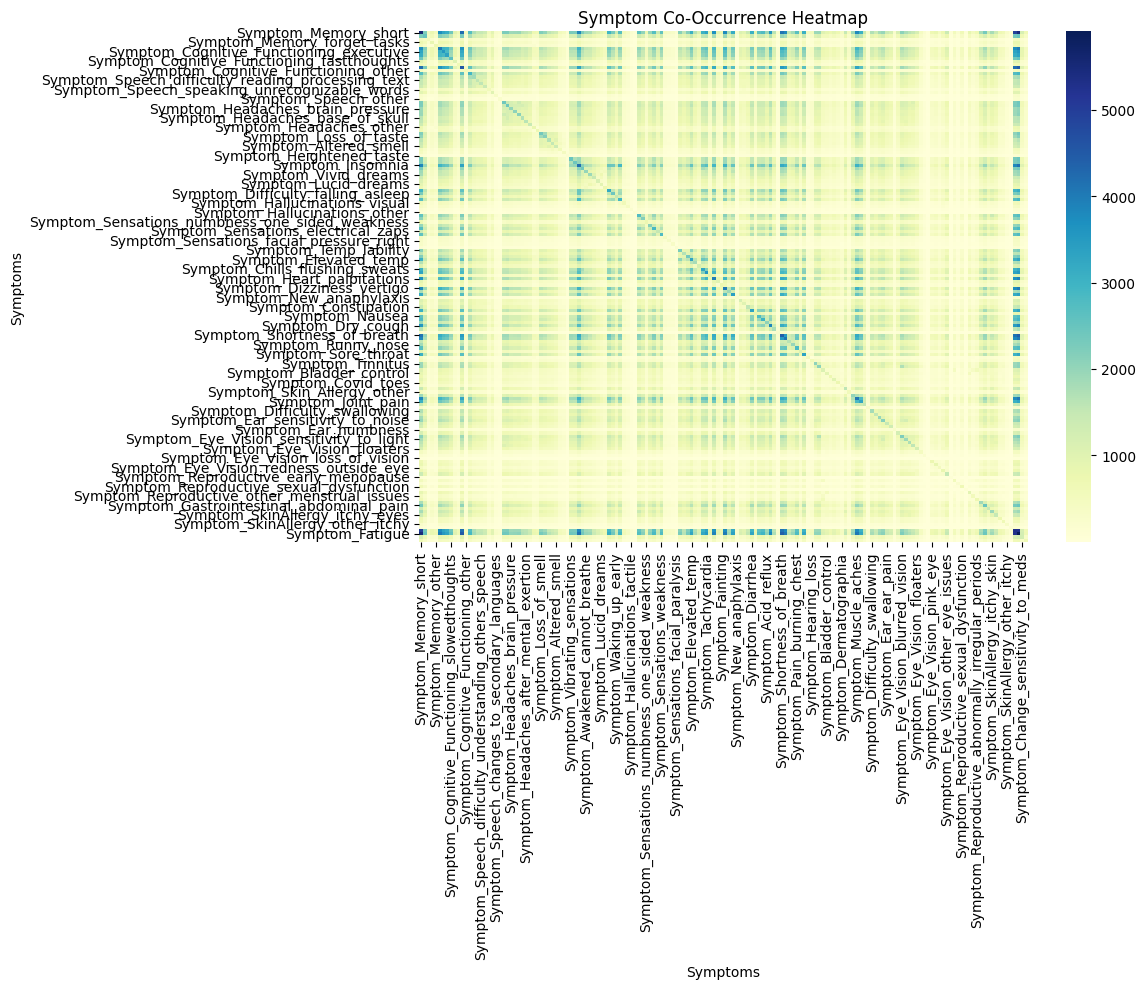

In [25]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(co_occurrence_df, cmap="YlGnBu", annot=False)  # cmap sets the color map

plt.title("Symptom Co-Occurrence Heatmap")
plt.xlabel("Symptoms")
plt.ylabel("Symptoms")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

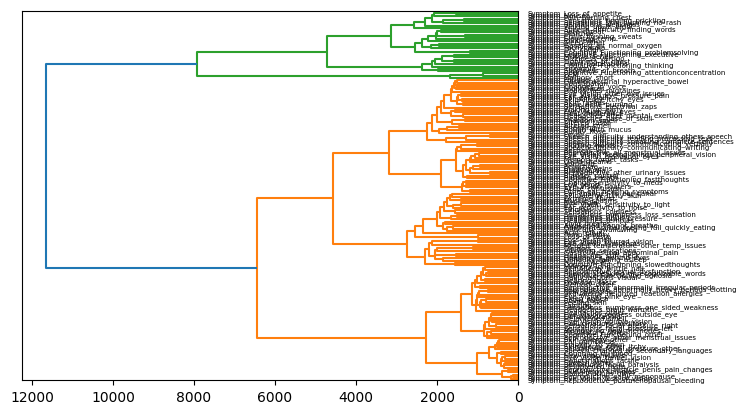

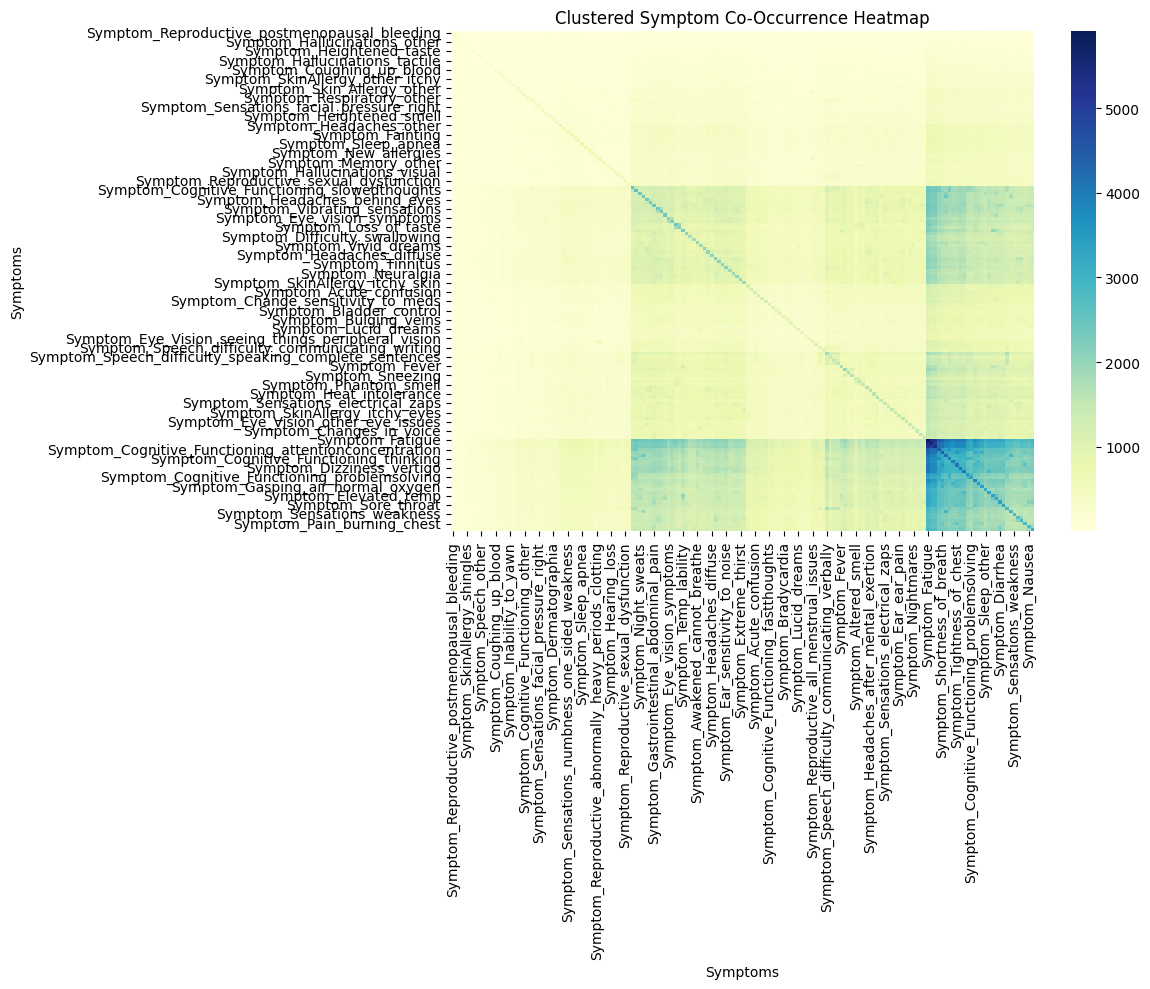

In [26]:

# Calculate the distance matrix for clustering
distance_matrix = 1 - co_occurrence_df

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='average')

# Define the order of rows and columns based on clustering
dendro_row = hierarchy.dendrogram(linkage_matrix, labels=co_occurrence_df.index, orientation='left')
order = dendro_row['leaves']
clustered_co_occurrence_df = co_occurrence_df.iloc[order, order]

# Create a clustered heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(clustered_co_occurrence_df, cmap="YlGnBu", annot=False)

plt.title("Clustered Symptom Co-Occurrence Heatmap")
plt.xlabel("Symptoms")
plt.ylabel("Symptoms")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [27]:
clusters = hierarchy.fcluster(linkage_matrix, t=10, criterion='maxclust')  # Adjust 't' as needed


In [29]:
clustered_co_occurrence_df.index[clusters == 1].values

array(['Symptom_Reproductive_early_menopause',
       'Symptom_SkinAllergy_shingles', 'Symptom_Eye_Vision_tunnel_vision',
       'Symptom_Coughing_up_blood', 'Symptom_Skin_Allergy_other',
       'Symptom_Cognitive_Functioning_other', 'Symptom_Respiratory_other',
       'Symptom_Headaches_other', 'Symptom_Headaches_brain_warmth',
       'Symptom_Eye_Vision_pink_eye',
       'Symptom_SkinAllergy_heighted_reaction_allergies',
       'Symptom_New_allergies', 'Symptom_SkinAllergy_brittle_nail',
       'Symptom_Headaches_behind_eyes', 'Symptom_Headaches_stiff_neck',
       'Symptom_Gastrointestinal_abdominal_pain',
       'Symptom_Vibrating_sensations', 'Symptom_Eye_vision_symptoms',
       'Symptom_Acid_reflux', 'Symptom_Difficulty_swallowing',
       'Symptom_Gastrointestinal_feeling_full_quickly_eating',
       'Symptom_Awakened_cannot_breathe', 'Symptom_Extreme_thirst',
       'Symptom_Acute_confusion', 'Symptom_Vomiting',
       'Symptom_Slurring_words',
       'Symptom_Speech_difficult

In [30]:
clustered_co_occurrence_df.index[clusters == 2].values

array(['Symptom_Eye_Vision_loss_of_vision', 'Symptom_Speech_other',
       'Symptom_Memory_no_new_memories',
       'Symptom_Sensations_facial_pressure_left',
       'Symptom_Reproductive_abnormally_heavy_periods_clotting',
       'Symptom_Reproductive_abnormally_irregular_periods',
       'Symptom_Phantom_taste',
       'Symptom_Cognitive_Functioning_slowedthoughts',
       'Symptom_Headaches_brain_pressure',
       'Symptom_Speech_difficulty_reading_processing_text',
       'Symptom_Nightmares', 'Symptom_Elevated_temp'], dtype=object)

In [31]:
clustered_co_occurrence_df.index[clusters == 3].values

array(['Symptom_Sensations_facial_pressure_right',
       'Symptom_Hallucinations_auditory',
       'Symptom_Eye_Vision_double_vision',
       'Symptom_Sensations_numbness_one_sided_weakness',
       'Symptom_Fainting', 'Symptom_Hearing_loss',
       'Symptom_Hallucinations_visual',
       'Symptom_Merged_temperature_other_temp_issues',
       'Symptom_Eye_Vision_blurred_vision', 'Symptom_Vivid_dreams',
       'Symptom_Ear_changes_to_ear_canal', 'Symptom_Bradycardia',
       'Symptom_Speech_difficulty_speaking_complete_sentences',
       'Symptom_Headaches_base_of_skull',
       'Symptom_Sensations_electrical_zaps', 'Symptom_Skin_rashes',
       'Symptom_SkinAllergy_itchy_eyes', 'Symptom_Changes_in_voice',
       'Symptom_Joint_pain', 'Symptom_Diarrhea'], dtype=object)

In [36]:
pd.Series(clusters).unique()

array([ 6,  2,  1,  4,  7,  8, 10,  5,  3,  9], dtype=int32)

In [37]:
clustered_co_occurrence_df.index[clusters == 4].values

array(['Symptom_Hallucinations_other', 'Symptom_Hallucinations_tactile',
       'Symptom_Reproductive_other_menstrual_issues',
       'Symptom_Speech_speaking_unrecognizable_words',
       'Symptom_Reproductive_sexual_dysfunction',
       'Symptom_Sensations_coldness',
       'Symptom_Eye_Vision_sensitivity_to_light', 'Symptom_Muscle_spasms',
       'Symptom_Eye_Vision_floaters', 'Symptom_Low_temp',
       'Symptom_Rattling_breath', 'Symptom_Restless_leg',
       'Symptom_Speech_difficulty_understanding_others_speech',
       'Symptom_Fever', 'Symptom_Cough_with_mucus',
       'Symptom_Eye_Vision_eye_pressure_pain',
       'Symptom_Headaches_migraines', 'Symptom_Fatigue',
       'Symptom_Insomnia', 'Symptom_Heart_palpitations',
       'Symptom_Tachycardia', 'Symptom_Nausea'], dtype=object)

In [38]:
clustered_co_occurrence_df.index[clusters == 5].values

array(['Symptom_Sensations_facial_pressure_other',
       'Symptom_SkinAllergy_other_itchy', 'Symptom_Inability_to_yawn',
       'Symptom_Ear_numbness', 'Symptom_Heightened_smell',
       'Symptom_Dermatographia', 'Symptom_Eye_Vision_redness_outside_eye',
       'Symptom_Peeling_skin', 'Symptom_Covid_toes',
       'Symptom_Sleep_apnea', 'Symptom_Cognitive_Functioning_agnosia',
       'Symptom_Night_sweats', 'Symptom_Loss_of_taste',
       'Symptom_Headaches_temples',
       'Symptom_Sensations_numbness_loss_sensation',
       'Symptom_Change_sensitivity_to_meds', 'Symptom_Petechiae',
       'Symptom_Eye_Vision_bloodshot_eyes',
       'Symptom_Eye_Vision_seeing_things_peripheral_vision',
       'Symptom_Altered_taste', 'Symptom_Eye_Vision_dry_eyes',
       'Symptom_Bone_ache_burning', 'Symptom_Ear_ear_pain',
       'Symptom_Constipation',
       'Symptom_Gastrointestinal_hyperactive_bowel',
       'Symptom_Tightness_of_chest', 'Symptom_Chills_flushing_sweats',
       'Symptom_Sore_throa

In [42]:
clustered_co_occurrence_df.index[clusters == 6].values

array(['Symptom_Reproductive_postmenopausal_bleeding',
       'Symptom_Sensations_tingling_prickling',
       'Symptom_Pain_burning_chest'], dtype=object)

In [43]:
clustered_co_occurrence_df.index[clusters == 7].values

array(['Symptom_Reproductive_testicle_penis_pain_changes',
       'Symptom_New_anaphylaxis', 'Symptom_Memory_other',
       'Symptom_Neuralgia', 'Symptom_SkinAllergy_itchy_skin',
       'Symptom_Lucid_dreams', 'Symptom_Memory_forget_tasks',
       'Symptom_Headaches_after_mental_exertion'], dtype=object)

In [44]:
clustered_co_occurrence_df.index[clusters == 8].values

array(['Symptom_Heightened_taste', 'Symptom_Sensations_facial_paralysis',
       'Symptom_Memory_long', 'Symptom_Headaches_diffuse',
       'Symptom_Tinnitus', 'Symptom_Ear_sensitivity_to_noise',
       'Symptom_Other_ear_hearing_symptoms',
       'Symptom_Cognitive_Functioning_fastthoughts',
       'Symptom_Bulging_veins',
       'Symptom_Speech_difficulty_communicating_writing',
       'Symptom_Heat_intolerance'], dtype=object)

In [45]:
clustered_co_occurrence_df.index[clusters == 9].values

array(['Symptom_Difficulty_falling_asleep', 'Symptom_Tremors',
       'Symptom_Loss_of_smell', 'Symptom_Temp_lability',
       'Symptom_Bladder_control',
       'Symptom_Reproductive_other_urinary_issues',
       'Symptom_Reproductive_all_menstrual_issues'], dtype=object)

In [46]:
clustered_co_occurrence_df.index[clusters == 10].values

array(['Symptom_Speech_changes_to_secondary_languages'], dtype=object)

In [75]:
# for each row in df, calculate the fraction of symptoms for each cluster that are present
# then asign that patient to the cluster with the highest fraction
df["Cluster"] = 0
df["Cluster_score"] = 0 
for row in df.index:
    clus_scores = []
    for cluster in range(2,10):
        clus_scores.append(df.loc[row, clustered_co_occurrence_df.index[clusters == cluster].values].sum() / len(clustered_co_occurrence_df.index[clusters == cluster].values))
    # which entry in clus scores is largest
    df.loc[row,"Cluster"] = np.argmax(clus_scores)+2
    df.loc[row,"Cluster_score"] = np.max(clus_scores)

In [79]:
df["Cluster"].value_counts()

Cluster
6    2276
9    1431
4     972
8     437
3     302
7     231
2     227
5     155
Name: count, dtype: int64

In [80]:
df["Cluster_score"].value_counts()
# maybe a lot of this is due to shared 0s? 
# I don't really like the groupings to begin with though....

Cluster_score
0.666667    1320
0.333333     986
0.428571     456
0.571429     289
0.285714     256
            ... 
0.950000       1
0.607143       1
0.916667       1
0.821429       1
0.035714       1
Name: count, Length: 74, dtype: int64

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_94431/3881327611.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


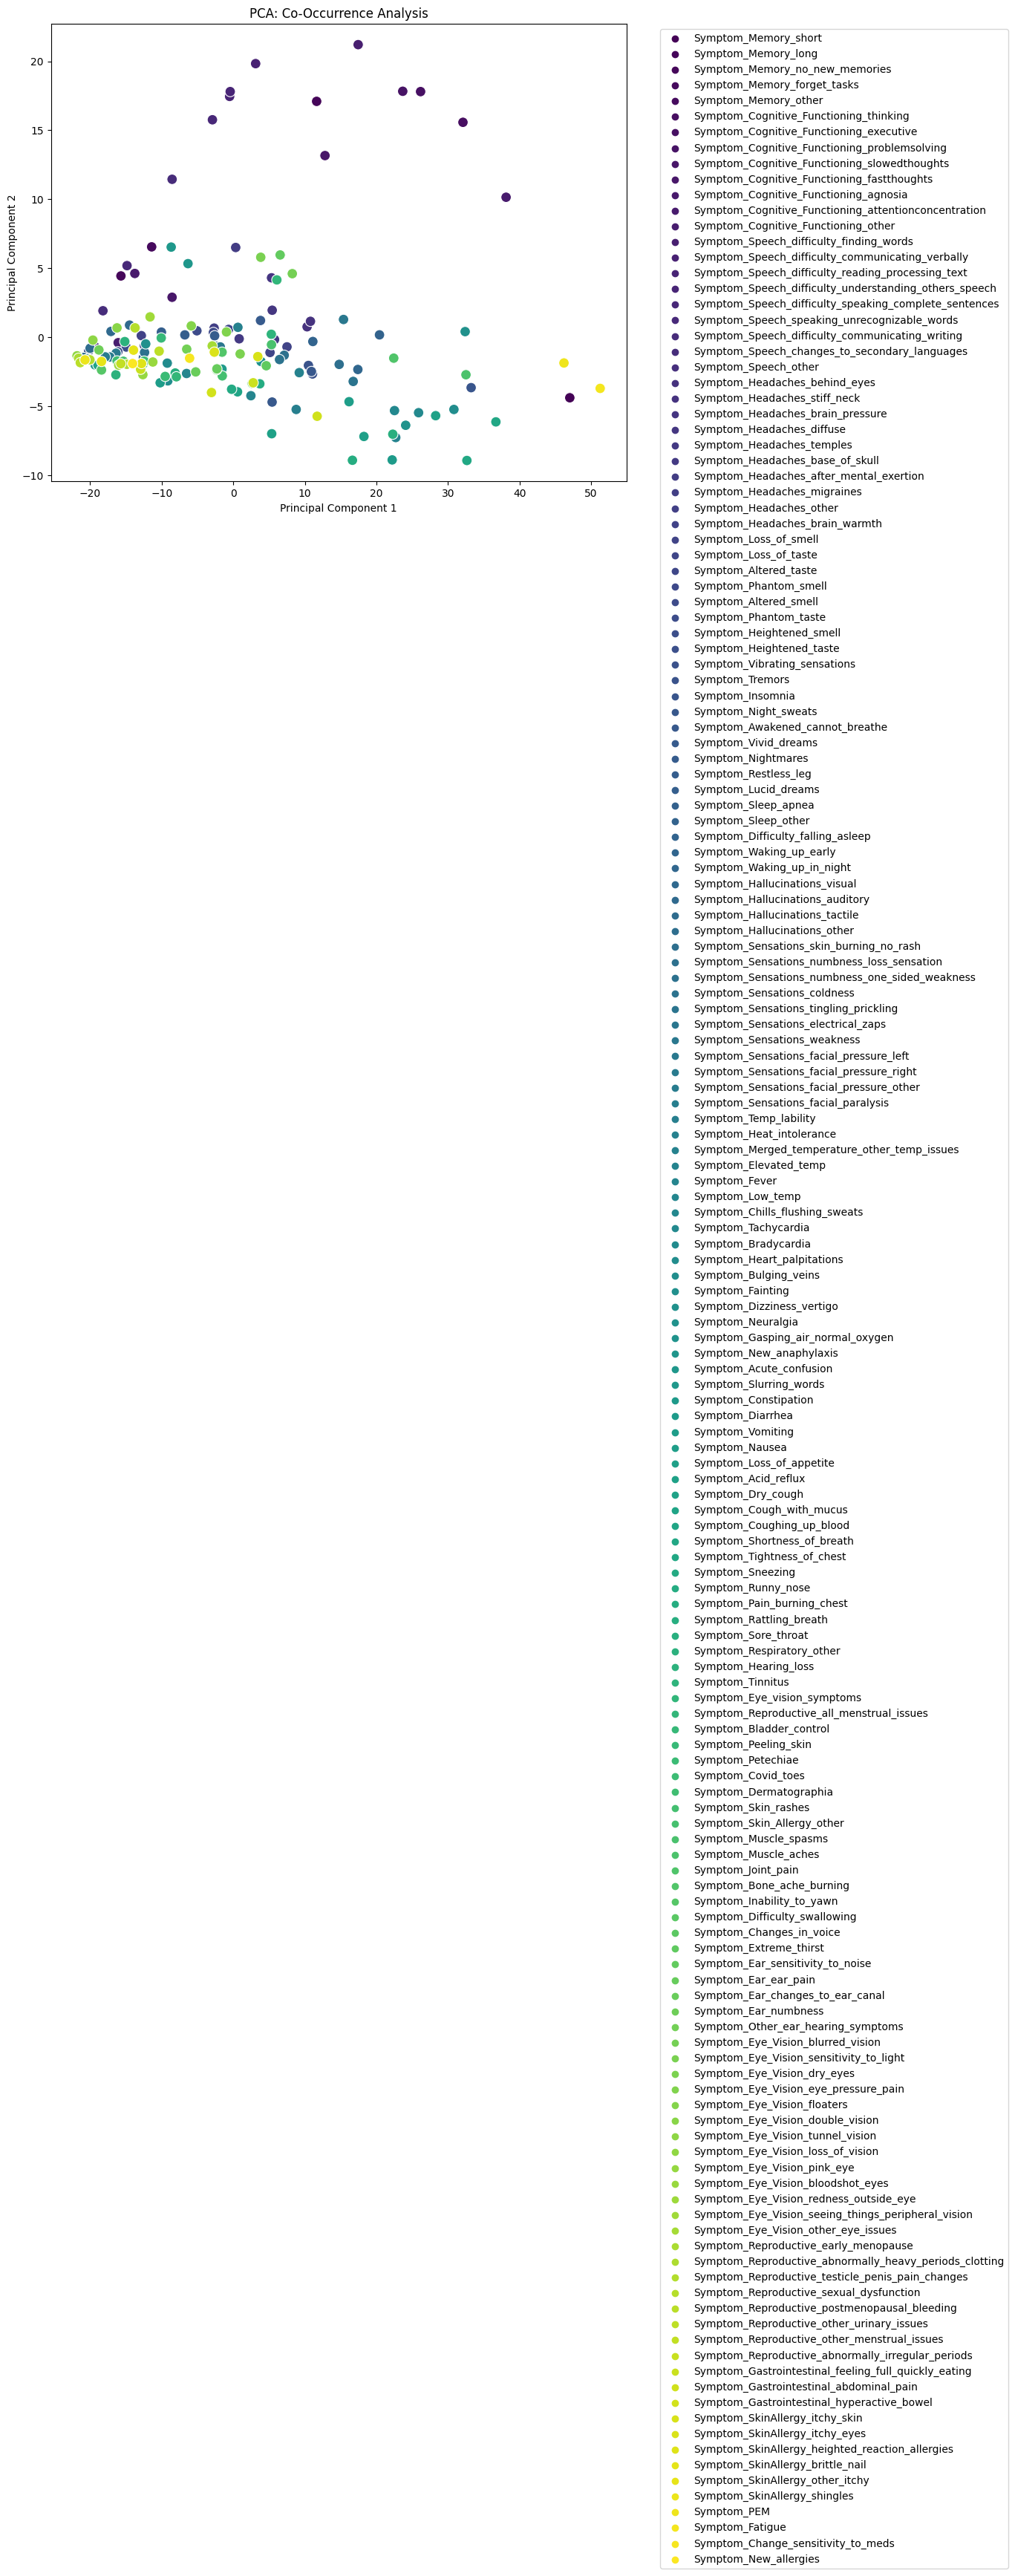

In [81]:
symptom_matrix_np = sympdf.T.values

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(symptom_matrix_np)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Assuming you already have the 'co_occurrence_df' DataFrame from earlier
# Add the symptom names to the PCA DataFrame
pca_df['Symptom'] = co_occurrence_df.index

# Create a scatter plot of the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Symptom', palette='viridis', s=100)

plt.title("PCA: Co-Occurrence Analysis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# grossly comparable to the previous version of the data frame 

In [83]:
# the two yellow points way off to the right are PEM and fatigue, so that bodes well 
pca_df

,PC1,PC2,Symptom
0,47.033343,-4.372460,Symptom_Memory_short
1,11.653955,17.098717,Symptom_Memory_long
2,-15.696435,4.452342,Symptom_Memory_no_new_memories
3,-11.403417,6.558621,Symptom_Memory_forget_tasks
4,-13.667289,0.665423,Symptom_Memory_other
...,...,...,...
157,-20.720790,-1.628098,Symptom_SkinAllergy_shingles
158,46.219100,-1.852932,Symptom_PEM
159,51.278132,-3.694398,Symptom_Fatigue
160,-6.097514,-1.507910,Symptom_Change_sensitivity_to_meds


In [86]:
# sort pca_df by PC1
pca_df.sort_values(by="PC1", ascending=False).head(20)

# good sign: fatigue, short term memory, PEM, cognitive functioning are all at the top of the list
# to me, PC1 seems to be dysautonmia and ME mostly

,PC1,PC2,Symptom
159,51.278132,-3.694398,Symptom_Fatigue
0,47.033343,-4.372460,Symptom_Memory_short
158,46.219100,-1.852932,Symptom_PEM
11,38.130727,10.152136,Symptom_Cognitive_Functioning_attentionconcent...
96,36.708073,-6.118975,Symptom_Shortness_of_breath
42,33.245071,-3.640460,Symptom_Insomnia
97,32.654693,-8.915944,Symptom_Tightness_of_chest
116,32.522545,-2.704606,Symptom_Muscle_aches
81,32.408876,0.419413,Symptom_Dizziness_vertigo
5,32.103294,15.580582,Symptom_Cognitive_Functioning_thinking


In [87]:
pca_df.sort_values(by="PC1", ascending=True).head(20)


,PC1,PC2,Symptom
135,-21.831224,-1.332530,Symptom_Eye_Vision_loss_of_vision
141,-21.611677,-1.509863,Symptom_Reproductive_early_menopause
145,-21.378146,-1.827465,Symptom_Reproductive_postmenopausal_bleeding
57,-20.899356,-1.454096,Symptom_Hallucinations_other
157,-20.720790,-1.628098,Symptom_SkinAllergy_shingles
68,-20.238773,-1.544778,Symptom_Sensations_facial_paralysis
39,-20.205355,-0.988269,Symptom_Heightened_taste
143,-20.028948,-1.622094,Symptom_Reproductive_testicle_penis_pain_changes
56,-20.009157,-0.786757,Symptom_Hallucinations_tactile
134,-19.615914,-0.196210,Symptom_Eye_Vision_tunnel_vision


In [88]:
pca_df.sort_values(by="PC2", ascending=True).head(20)
# maybe short-term symptoms?? 

,PC1,PC2,Symptom
97,32.654693,-8.915944,Symptom_Tightness_of_chest
100,16.655591,-8.900377,Symptom_Pain_burning_chest
88,22.210342,-8.874346,Symptom_Diarrhea
72,22.710574,-7.252906,Symptom_Elevated_temp
91,18.262795,-7.177100,Symptom_Loss_of_appetite
102,22.296345,-7.013221,Symptom_Sore_throat
92,5.374470,-6.976574,Symptom_Acid_reflux
83,24.097618,-6.366116,Symptom_Gasping_air_normal_oxygen
96,36.708073,-6.118975,Symptom_Shortness_of_breath
150,11.724765,-5.712043,Symptom_Gastrointestinal_abdominal_pain


In [89]:
pca_df.sort_values(by="PC2", ascending=False).head(20)
# and this looks like neuro stuff really strongly

,PC1,PC2,Symptom
13,17.455268,21.206819,Symptom_Speech_difficulty_finding_words
14,3.128533,19.831162,Symptom_Speech_difficulty_communicating_verbally
7,23.685634,17.828474,Symptom_Cognitive_Functioning_problemsolving
16,-0.425627,17.806110,Symptom_Speech_difficulty_understanding_others...
6,26.180528,17.805812,Symptom_Cognitive_Functioning_executive
15,-0.508023,17.455504,Symptom_Speech_difficulty_reading_processing_text
1,11.653955,17.098717,Symptom_Memory_long
17,-2.911248,15.764820,Symptom_Speech_difficulty_speaking_complete_se...
5,32.103294,15.580582,Symptom_Cognitive_Functioning_thinking
8,12.822321,13.170869,Symptom_Cognitive_Functioning_slowedthoughts
